In [0]:
!pip install tensorflow.gpu
import numpy as np
import tensor flow as tf
import pandas as pd


In [0]:
from google.colab import drive 

drive.mount("/content/drive");


In [0]:
import os;
import cv2

parasitizedPath = "/content/drive/My Drive/AI_database/cell_images/Parasitized/";
paraImages_files = os.listdir(parasitizedPath);
del paraImages_files[998:3900]
unInfectedPath = "/content/drive/My Drive/AI_database/cell_images/Uninfected/";
unInfectedImages_files = os.listdir(unInfectedPath);
del unInfectedImages_files[850:13790];
pTrain_images = [cv2.imread(parasitizedPath+file) for file in paraImages_files]
unInfecTrain_images = [cv2.imread(unInfectedPath+file) for file in unInfectedImages_files]

pTrainLable = [1 for f in pTrain_images];
unInfecTrainLable = [0 for f in unInfecTrain_images];


image_files = paraImages_files+unInfectedImages_files;
train_images = pTrain_images+unInfecTrain_images;
train_labels = pTrainLable+unInfecTrainLable;


print("print infected : ",len(paraImages_files));
print("print uninfected : ",len(unInfectedImages_files)," images ",paraImages_files[0],unInfectedImages_files[0]);
print("print uninfected : ",len(pTrain_images));
print("print uninfected : ",len(unInfecTrain_images));
print("total , files ",len(image_files),", train_images : ",len(train_images),", train_labels : ",len(train_labels));


print infected :  998
print uninfected :  850  images  C137P98ThinF_IMG_20151005_160122_cell_73.png C71P32_ThinF_IMG_20150813_162554_cell_13.png
print uninfected :  998
print uninfected :  850
total , files  1848 , train_images :  1848 , train_labels :  1848


In [0]:
def preprocess_image(img,side=110):
  min_side = min(img.shape[0],img.shape[1])
  img = img[:min_side, :min_side]
  img = cv2.resize(img,(side,side))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return   img/255.0;

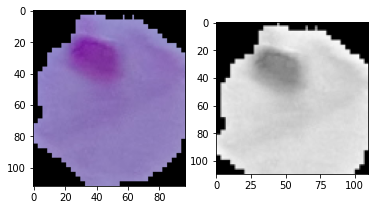

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

preview_index = 80;
plt.subplot(1,2,1);
plt.imshow(train_images[preview_index]);
plt.subplot(1,2,2);
plt.imshow(preprocess_image(train_images[preview_index]),cmap="gray")

In [0]:
for i in range(len(train_images)):
  train_images[i] = preprocess_image(train_images[i]);    

In [0]:
import numpy as np 

train_images = np.expand_dims(train_images,axis=-1);
train_labels = np.array(train_labels);
print(train_images.shape,train_labels.shape);

(1848, 110, 110, 1) (1848,)


In [0]:
import tensorflow as tf

layers = [
          tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3), padding="same", activation=tf.nn.relu, input_shape=train_images.shape[1:]),
          tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

          tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3), padding="same", activation=tf.nn.relu, ),
          tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

          tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3), padding="same", activation=tf.nn.relu, ),
          tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

          tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3), padding="same", activation=tf.nn.relu, ),
          tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

          tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3), padding="same", activation=tf.nn.relu, ),
          tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
          tf.keras.layers.Dense(units=256, activation=tf.nn.relu),          
          tf.keras.layers.Dense(units=2, activation=tf.nn.softmax),
]

model = tf.keras.Sequential(layers);
model.compile(optimizer=tf.optimizers.Adam(),
              loss=tf.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.metrics.SparseTopKCategoricalAccuracy()]);


model.fit(train_images,train_labels,epochs=30, batch_size=50)
model.save_weights("model.tf");            

Epoch 1/30
37/37 [==============================] - 0s 12ms/step - loss: 0.7060 - sparse_top_k_categorical_accuracy: 1.0000
Epoch 2/30
37/37 [==============================] - 0s 10ms/step - loss: 0.6916 - sparse_top_k_categorical_accuracy: 1.0000
Epoch 3/30
37/37 [==============================] - 0s 10ms/step - loss: 0.6911 - sparse_top_k_categorical_accuracy: 1.0000
Epoch 4/30
37/37 [==============================] - 0s 10ms/step - loss: 0.6885 - sparse_top_k_categorical_accuracy: 1.0000
Epoch 5/30
37/37 [==============================] - 0s 10ms/step - loss: 0.6883 - sparse_top_k_categorical_accuracy: 1.0000
Epoch 6/30
37/37 [==============================] - 0s 9ms/step - loss: 0.6751 - sparse_top_k_categorical_accuracy: 1.0000
Epoch 7/30
37/37 [==============================] - 0s 9ms/step - loss: 0.6699 - sparse_top_k_categorical_accuracy: 1.0000
Epoch 8/30
37/37 [==============================] - 0s 10ms/step - loss: 0.6660 - sparse_top_k_categorical_accuracy: 1.0000
Epoch 9/30

In [0]:
from google.colab import files
uploads = files.upload()


Saving 0.png to 0 (3).png
Saving 1.png to 1 (3).png
Saving 2.png to 2 (3).png
Saving 3.png to 3 (3).png
Saving 4.png to 4 (3).png
Saving 5.png to 5 (3).png
Saving 7.png to 7 (3).png
Saving 8.png to 8 (3).png
Saving 9.png to 9 (3).png
Saving 10.png to 10 (3).png
Saving 11.png to 11 (3).png
Saving 12.png to 12 (3).png
Saving 13.png to 13 (3).png


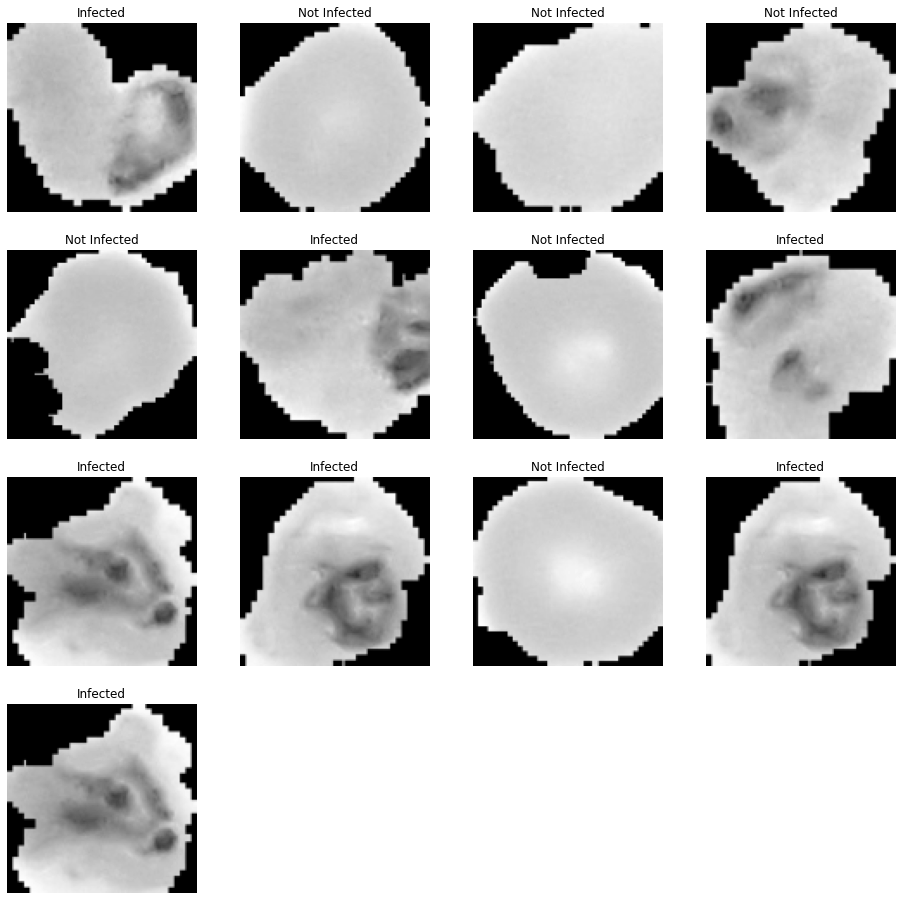

In [0]:
eval_images = [preprocess_image(cv2.imread(file)) for file in uploads.keys()]
eval_model = tf.keras.Sequential(layers)
eval_model.load_weights("model.tf");
eval_predictions = eval_model.predict(np.expand_dims(eval_images,axis=-1))


cols =4
rows  = np.ceil(len(eval_images)/cols)
fig = plt.gcf()
fig.set_size_inches(cols*4,rows*4)
for i in range(len(eval_images)):
  plt.subplot(rows,cols,i+1)
  plt.imshow(eval_images[i],cmap="gray")
  plt.title("Infected" if np.argmax(eval_predictions[i]) == 1 else "Not Infected")
  plt.axis("off")